<a href="https://colab.research.google.com/github/shiwangi20/DataScienceSolutions/blob/master/KMeans_with_silhouette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title : KMeans implementation from scratch using Silhouette Distance to find optimum K value

Created on :  8 May, 2020
Author : Shiwangi Garg

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class K_Means:
  def __init__(self,k = 2,max_iter = 300):
    self.k = k
    self.max_iter = max_iter
    self.means = []
    self.labels = []
    self.clusters = []

  def fit(self,data):
    self.means = []

    # randomly assign values of means
    for i in range(self.k):
      self.means.append(data[i+self.k])
    
    for i in range(self.max_iter):
      # make clusters
      self.clusters = []
      for j in range(self.k):
        self.clusters.append([])
      
      self.labels = []
      # assign each data point to clusters
      for points in data:
        # find distance to each mean
        distances = [((points - m)**2).sum() for m in self.means]
        # find minimum distance
        min_distance = min(distances)
        # find index of mean corresponding to minimum distance
        label = distances.index(min_distance)
        # assign point to cluster
        self.clusters[label].append(points)
        # assign labels
        self.labels.append(label)

      
      # if there is no change in mean stop early
      change = True

      # update the new means
      for j in range(self.k):
        new_mean = np.average(self.clusters[i])
        if np.array_equal(new_mean,self.means[i]):
          change =  False
        else:
          self.means[i] = new_mean
          change = True
      
      if not change:
        break

  def predict(self,data):
    predictions = []

    for points in data:
      # find distance to each mean
      distances = [((points - m)**2).sum() for m in self.means]
      # find minimum distance
      min_distance = min(distances)
      # find index of mean corresponding to minimum distance
      min_distance_index = distances.index(min_distance)
      # find the cluster
      predictions.append(min_distance_index)

    return predictions

  def silhoutte(self,data,k_start = 1,k_end = 2):
    silhouette_distance = []

    for k in range(k_start,k_end+1):
      # calculate silhouette distances for each data point
      s_distances = []
      self.k = k
      # fit the data in k clusters
      self.fit(data)
      # find s[i] for each data point

      for i in range(len(data)):
        index = self.labels[i]
        # calculate a
        a = (sum([((data[i] - point)**2).sum() for point in self.clusters[index]])/len(self.clusters[index]))
        # calculate b
        distances = [(sum([((data[i] - point)**2).sum() for point in self.clusters[j]])/len(self.clusters[j])) if len(self.clusters[j]) else float('inf') for j in range(k) if j != index]
        b = min(distances)
        # calculate s
        s = abs((b - a))/max(a,b)
        s_distances.append(s)

      # take average 
      avg = np.average(s_distances)
      silhouette_distance.append(avg)

    # find the maximum value of silhouette distances and corresponding value of k
    best_k = k_start + silhouette_distance.index(max(silhouette_distance))
    return best_k

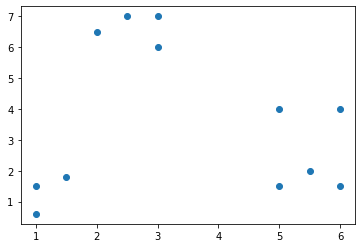

In [185]:
x = np.array([[1,1.5],[1.5,1.8],[5,4],[3,7],[2.5,7],[3,6],[5.5,2],[5,1.5],[6,1.5],[1,0.6],[6,4],[2,6.5]])
np.random.shuffle(x)
plt.scatter(x[:,0],x[:,1])

In [186]:
k_means = K_Means()
best_k = k_means.silhoutte(x,2,5)
best_k

3

In [0]:
k_means1 = K_Means(best_k)
k_means1.fit(x)

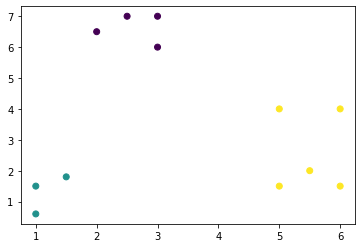

In [188]:
plt.scatter(x[:,0],x[:,1],c = k_means1.labels)